In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Data/data.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     599 non-null    object
 1   sentiment  599 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


In [4]:
df.sentiment[df.sentiment == 'positive'] = 1
df.sentiment[df.sentiment == 'negative'] = 0

In [5]:
df['sentiment'].value_counts()

0    309
1    290
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment'>

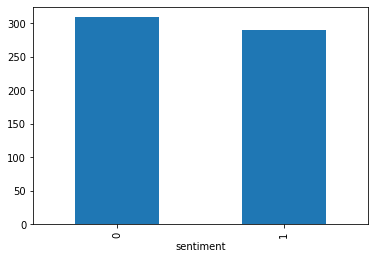

In [6]:
df.groupby('sentiment').size().plot(kind='bar')

In [8]:
pos_sent=df[df['sentiment']==1]
len(pos_sent)

290

In [9]:
pos_sent=df[df['sentiment']==1]
type(pos_sent)

pandas.core.frame.DataFrame

In [23]:
!pip install wordcloud

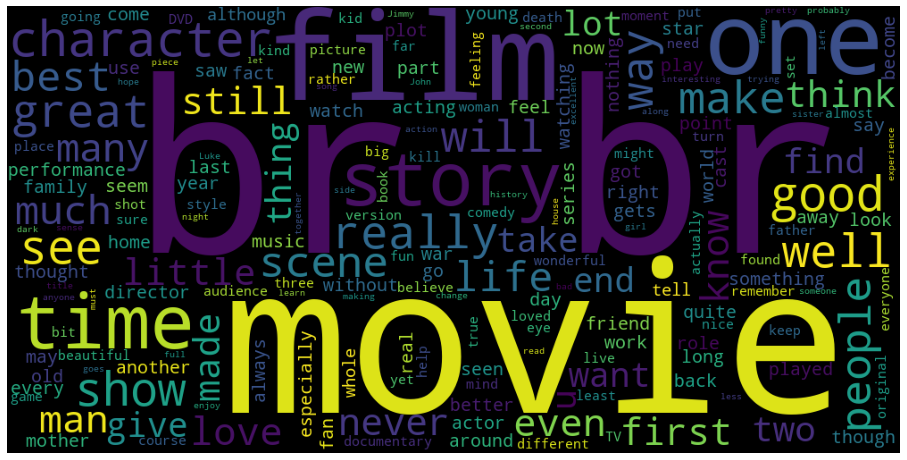

In [10]:
#sentence tokensization, stemming, stopwords (is, was, had, has)
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
pos_words=' '.join(pos_sent['review'])

pos_cloud=WordCloud(width=1000,height=500).generate(pos_words)
plt.figure(figsize=(16,10))
plt.imshow(pos_cloud)
plt.axis('off')
plt.show()

In [12]:
neg_sent=df[df['sentiment']==0]
neg_sent

,review,sentiment
3,Basically there's a family where a little boy ...,0
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
10,Phil the Alien is one of those quirky films wh...,0
11,I saw this movie when I was about 12 when it c...,0
...,...,...
593,Robert Colomb has two full-time jobs. He's kno...,0
594,This is your typical junk comedy.<br /><br />T...,0
596,"Bad plot, bad dialogue, bad acting, idiotic di...",0
597,I am a Catholic taught in parochial elementary...,0


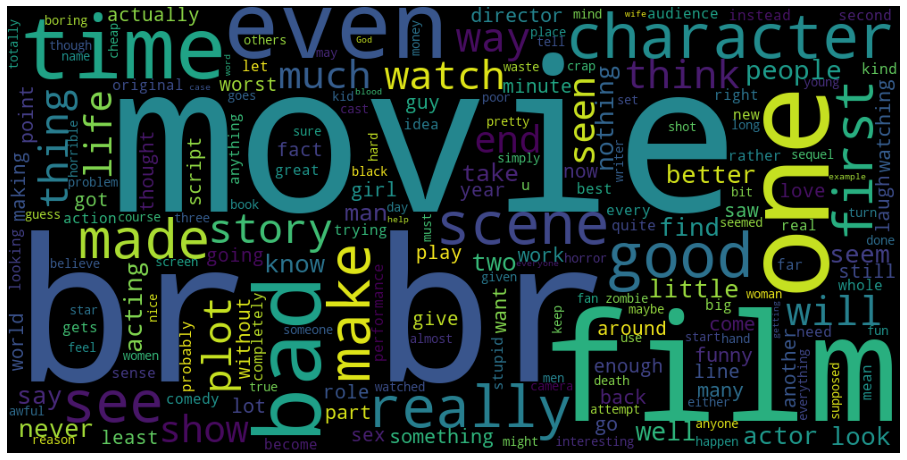

In [13]:
neg_words=' '.join(neg_sent['review'])

neg_cloud=WordCloud(width=1000,height=500).generate(neg_words)
plt.figure(figsize=(16,10))
plt.imshow(neg_cloud)
plt.axis('off')
plt.show()

In [14]:
df['sentiment']=df['sentiment'].replace(to_replace='positive',value=1)
df['sentiment']=df['sentiment'].replace(to_replace='negative',value=0)

In [15]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
594,This is your typical junk comedy.<br /><br />T...,0
595,I thought this movie did a down right good job...,1
596,"Bad plot, bad dialogue, bad acting, idiotic di...",0
597,I am a Catholic taught in parochial elementary...,0


Creating a corpus

In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
ps=WordNetLemmatizer()
corpus=[]

for i in range(0,len(df)):
    reviews=re.sub('[^a-zA-Z]',' ',df['review'][i])
    reviews=reviews.lower()
    reviews=reviews.split()
    reviews=[ps.lemmatize(word) for word in reviews if not word in set(stopwords.words('english'))]
    reviews=' '.join(reviews)
    corpus.append(reviews)

In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
ps=WordNetLemmatizer()
corpus=[]

for i in range(0,len(df)):
    reviews=re.sub('[^a-zA-Z]',' ',df['review'][i])
    reviews=reviews.lower()
    reviews=reviews.split()
    reviews=[ps.lemmatize(word) for word in reviews if not word in set(stopwords.words('english'))]
    reviews=' '.join(reviews)
    corpus.append(reviews)

Bag of words

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2000)

x=cv.fit_transform(corpus).toarray()

In [20]:
y=df.iloc[:,[1]].values
y

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/4,random_state=0)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)

c:\users\neeraj\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
cm_gnb=confusion_matrix(y_test,gnb_pred)
print(cm_gnb)
acc_gnb=accuracy_score(y_test,gnb_pred)
print(acc_gnb)

[[52 24]
 [24 50]]
0.68


In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [26]:
precision_gnb = precision_score(y_test,gnb_pred, labels=[1,2], average='micro')
print('Precision GNB: %.3f' % precision_gnb)
recall_gnb = recall_score(y_test,gnb_pred, average='binary')
print('Recall GNB: %.3f' % recall_gnb)
score_gnb = f1_score(y_test,gnb_pred, average='binary')
print('F-Measure GNB: %.3f' % score_gnb)
auc_gnb = roc_auc_score(y_test,gnb_pred)
print('AUC GNB: %.3f' % auc_gnb)

Precision GNB: 0.676
Recall GNB: 0.676
F-Measure GNB: 0.676
AUC GNB: 0.680


In [27]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
bnb_pred=bnb.predict(x_test)
cm_bnb=confusion_matrix(y_test,bnb_pred)
print(cm_bnb)
acc_bnb=accuracy_score(y_test,bnb_pred)
precision_bnb = precision_score(y_test,bnb_pred, labels=[1,2], average='micro')
print('Precision BNB: %.3f' % precision_bnb)
recall_bnb = recall_score(y_test,bnb_pred, average='binary')
print('Recall BNB: %.3f' % recall_bnb)
score_bnb = f1_score(y_test,bnb_pred, average='binary')
print('F-Measure BNB: %.3f' % score_bnb)
auc_bnb = roc_auc_score(y_test,bnb_pred)
print('AUC BNB: %.3f' % auc_bnb)

[[58 18]
 [18 56]]
Precision BNB: 0.757
Recall BNB: 0.757
F-Measure BNB: 0.757
AUC BNB: 0.760


c:\users\neeraj\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
cm_lr=confusion_matrix(y_test,lr_pred)
print(cm_lr)
acc_lr=accuracy_score(y_test,lr_pred)
precision_lr = precision_score(y_test,lr_pred, labels=[1,2], average='micro')
print('Precision LR: %.3f' % precision_lr)
recall_lr = recall_score(y_test,lr_pred, average='binary')
print('Recall LR: %.3f' % recall_lr)
score_lr = f1_score(y_test,lr_pred, average='binary')
print('F-Measure LR: %.3f' % score_lr)
auc_lr = roc_auc_score(y_test,lr_pred)
print('AUC LR: %.3f' % auc_lr)

c:\users\neeraj\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[63 13]
 [21 53]]
Precision LR: 0.803
Recall LR: 0.716
F-Measure LR: 0.757
AUC LR: 0.773


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
cm_dtc=confusion_matrix(y_test,dtc_pred)
cm_dtc
acc_dtc=accuracy_score(y_test,dtc_pred)
precision_dtc = precision_score(y_test,dtc_pred, labels=[1,2], average='micro')
print('Precision DTC: %.3f' % precision_dtc)
recall_dtc = recall_score(y_test,dtc_pred, average='binary')
print('Recall DTC: %.3f' % recall_dtc)
score_dtc = f1_score(y_test,dtc_pred, average='binary')
print('F-Measure DTC: %.3f' % score_dtc)
auc_dtc = roc_auc_score(y_test,dtc_pred)
print('AUC DTC: %.3f' % auc_dtc)

Precision DTC: 0.610
Recall DTC: 0.635
F-Measure DTC: 0.623
AUC DTC: 0.620


In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=400,random_state=0)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
cm_rfc=confusion_matrix(y_test,rfc_pred)
cm_rfc
acc_rfc=accuracy_score(y_test,rfc_pred)
precision_rfc = precision_score(y_test,rfc_pred, labels=[1,2], average='micro')
print('Precision RFC: %.3f' % precision_rfc)
recall_rfc = recall_score(y_test,rfc_pred, average='binary')
print('Recall RFC: %.3f' % recall_rfc)
score_rfc = f1_score(y_test,rfc_pred, average='binary')
print('F-Measure RFC: %.3f' % score_rfc)
auc_rfc = roc_auc_score(y_test,rfc_pred)
print('AUC RFC: %.3f' % auc_rfc)

c:\users\neeraj\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Precision RFC: 0.746
Recall RFC: 0.635
F-Measure RFC: 0.686
AUC RFC: 0.712


In [31]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
cm_svc=confusion_matrix(y_test,svc_pred)
cm_svc
acc_svc=accuracy_score(y_test,svc_pred)
precision_svc = precision_score(y_test,svc_pred, labels=[1,2], average='micro')
print('Precision SVM: %.3f' % precision_svc)
recall_svc = recall_score(y_test,svc_pred, average='binary')
print('Recall SVM: %.3f' % recall_svc)
score_svc = f1_score(y_test,svc_pred, average='binary')
print('F-Measure SVM: %.3f' % score_svc)
auc_svc = roc_auc_score(y_test,svc_pred)
print('AUC SVM: %.3f' % auc_svc)

c:\users\neeraj\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Precision SVM: 0.714
Recall SVM: 0.676
F-Measure SVM: 0.694
AUC SVM: 0.706


In [32]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
KNN_pred=KNN.predict(x_test)
cm_KNN=confusion_matrix(y_test,KNN_pred)
cm_KNN
acc_KNN=accuracy_score(y_test,KNN_pred)
precision_KNN = precision_score(y_test,KNN_pred, labels=[1,2], average='micro')
print('Precision KNN: %.3f' % precision_KNN)
recall_KNN = recall_score(y_test,KNN_pred, average='binary')
print('Recall KNN: %.3f' % recall_KNN)
score_KNN = f1_score(y_test,KNN_pred, average='binary')
print('F-Measure KNN: %.3f' % score_KNN)
auc_KNN = roc_auc_score(y_test,KNN_pred)
print('AUC KNN: %.3f' % auc_KNN)

Precision KNN: 0.566
Recall KNN: 0.581
F-Measure KNN: 0.573
AUC KNN: 0.573


c:\users\neeraj\appdata\local\programs\python\python36\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [33]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(max_iter=1000, tol=1e-3)
SGD.fit(x_train,y_train)
SGD_pred=SGD.predict(x_test)
cm_SGD=confusion_matrix(y_test,SGD_pred)
cm_SGD
acc_SGD=accuracy_score(y_test,SGD_pred)
precision_SGD = precision_score(y_test,SGD_pred, labels=[1,2], average='micro')
print('Precision SGD: %.3f' % precision_SGD)
recall_SGD = recall_score(y_test,SGD_pred, average='binary')
print('Recall SGD: %.3f' % recall_SGD)
score_SGD = f1_score(y_test,SGD_pred, average='binary')
print('F-Measure SGD: %.3f' % score_SGD)
auc_SGD = roc_auc_score(y_test,SGD_pred)
print('AUC SGD: %.3f' % auc_SGD)

c:\users\neeraj\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Precision SGD: 0.734
Recall SGD: 0.784
F-Measure SGD: 0.758
AUC SGD: 0.754


In [34]:
from sklearn.linear_model import RidgeClassifier
RRL = RidgeClassifier()
RRL.fit(x_train,y_train)
RRL_pred=RRL.predict(x_test)
cm_RRL=confusion_matrix(y_test,RRL_pred)
cm_RRL
acc_RRL=accuracy_score(y_test,RRL_pred)
precision_RRL = precision_score(y_test,RRL_pred, labels=[1,2], average='micro')
print('Precision RRL: %.3f' % precision_RRL)
recall_RRL = recall_score(y_test,RRL_pred, average='binary')
print('Recall RRL: %.3f' % recall_RRL)
score_RRL = f1_score(y_test,RRL_pred, average='binary')
print('F-Measure RRL: %.3f' % score_RRL)
auc_RRL = roc_auc_score(y_test,RRL_pred)
print('AUC RRL: %.3f' % auc_RRL)

c:\users\neeraj\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Precision RRL: 0.746
Recall RRL: 0.676
F-Measure RRL: 0.709
AUC RRL: 0.726


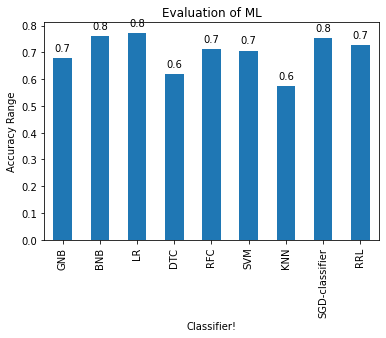

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [acc_gnb,acc_bnb,acc_lr,acc_dtc,acc_rfc,acc_svc,acc_KNN,acc_SGD,acc_RRL]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)
#freq_series = np.array(s)
#freq_series = pd.Series.from_array(frequencies)

x_labels = ['GNB', 'BNB','LR','DTC','RFC','SVM','KNN','SGD-classifier','RRL']

# Plot the figure.
#plt.figure(figsize=(12, 8))
#ax=plt.plot(freq_series)
#plt.show()
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

In [41]:
import pandas as pd
from prettytable import PrettyTable

data = [['GNB',auc_gnb,precision_gnb,recall_gnb,score_gnb,auc_gnb],
        ['BNB',auc_bnb,precision_bnb,recall_bnb,score_bnb,auc_bnb],
        ['LR',auc_lr,precision_lr,recall_lr,score_lr,auc_lr],
        ['DTC',auc_dtc,precision_dtc,recall_dtc,score_dtc,auc_dtc],
        ['RFC',auc_rfc,precision_rfc,recall_rfc,score_rfc,auc_rfc],
        ['SVC',auc_svc,precision_svc,recall_svc,score_svc,auc_svc],
        ['KNN',auc_KNN,precision_KNN,recall_KNN,score_KNN,auc_KNN],
        ['SGD',auc_SGD,precision_SGD,recall_SGD,score_SGD,auc_SGD],
        ['RRL',auc_RRL,precision_RRL,recall_RRL,score_RRL,auc_RRL]]

df = pd.DataFrame(data, columns=['Classifier', 'Accuracy', 'Precision','Recall','Fmeasure','AUC'])

def generate_ascii_table(df):
    x = PrettyTable()
    x.field_names = df.columns.tolist()
    for row in df.values:
        x.add_row(row)
    print(x)
    return x

generate_ascii_table(df)

+------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Classifier |      Accuracy      |     Precision      |       Recall       |      Fmeasure      |        AUC         |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    GNB     | 0.6799431009957325 | 0.6756756756756757 | 0.6756756756756757 | 0.6756756756756757 | 0.6799431009957325 |
|    BNB     | 0.7599573257467994 | 0.7567567567567568 | 0.7567567567567568 | 0.7567567567567567 | 0.7599573257467994 |
|     LR     | 0.7725817923186344 | 0.803030303030303  | 0.7162162162162162 | 0.7571428571428571 | 0.7725817923186344 |
|    DTC     | 0.6201991465149359 | 0.6103896103896104 | 0.6351351351351351 | 0.6225165562913907 | 0.6201991465149359 |
|    RFC     | 0.7123044096728307 | 0.746031746031746  | 0.6351351351351351 | 0.6861313868613138 | 0.7123044096728307 |
|    SVC     | 0.7062588904694168 | 0.71

Classifier,Accuracy,Precision,Recall,Fmeasure,AUC
GNB,0.6799431009957325,0.6756756756756757,0.6756756756756757,0.6756756756756757,0.6799431009957325
BNB,0.7599573257467994,0.7567567567567568,0.7567567567567568,0.7567567567567567,0.7599573257467994
LR,0.7725817923186344,0.803030303030303,0.7162162162162162,0.7571428571428571,0.7725817923186344
DTC,0.6201991465149359,0.6103896103896104,0.6351351351351351,0.6225165562913907,0.6201991465149359
RFC,0.7123044096728307,0.746031746031746,0.6351351351351351,0.6861313868613138,0.7123044096728307
SVC,0.7062588904694168,0.7142857142857143,0.6756756756756757,0.6944444444444444,0.7062588904694168
KNN,0.5734352773826459,0.5657894736842105,0.581081081081081,0.5733333333333333,0.5734352773826459
SGD,0.7537339971550496,0.7341772151898734,0.7837837837837838,0.7581699346405228,0.7537339971550496
RRL,0.7259957325746799,0.746268656716418,0.6756756756756757,0.7092198581560283,0.7259957325746799


In [42]:
import pickle
model=pickle.dump(lr,open('model.pickle','wb'))

In [43]:
pre_model=pickle.dump(cv,open('pre_model.pickle','wb'))